로지스틱회귀모델 구현 : 분류

In [122]:
# from sklearn import svm, metrics
# from sklearn.neighbors import KNeighborsClassifier # 분류
# from sklearn.neighbors import KNeighborsRegressor # 회귀-예측
from sklearn.linear_model import LinearRegression # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split # train_test_split : train data, test data를 나누는 함수
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # 한글설정
matplotlib.rcParams['font.size'] = 10 # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 마이너스 기호(-) 표기

In [123]:
import pandas as pd
df = pd.read_csv('https://bit.ly/fish_csv')
df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [124]:
# 선형회귀의 경우 예측률을 높이기 위해 특성값을 늘려줬어. 1차방정식 -> 2차방정식 ==> 효율 증가
# 로지스틱회귀 데이터 구조 확인 필요 : df.describe() 활용. 규제, 가중치, 표준점수

In [125]:
df.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [126]:
# 분류하는 형태가 7가지
df['Species'].unique() # target 개수 확인

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [127]:
df['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [128]:
# 한글 유무 확인 필요. ==> 컬럼에 str 문자 타입이 존재하는지 확인
# 문자 있으면 머신러닝을 돌릴 수 없음.
# 문자를 삭제할 것인지, 코드로 변경할 것인지를 정해야 함.
# 문자 코드 변경 방법(2) : 둘 중에 하나로 진행하며, df.info()로 확인 가능
  # 1. 문자 아스키코드 변경 방식 - 표준점수
  # 2. 원핫인코딩 방식

In [129]:
df.info()
# object(str type) : result , target은 문자올 수 있음. 훈련x 결과만 보여주니까. 
# 한글자가 아니니까 원핫인코딩

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [130]:
df['Species'].head(2)

0    Bream
1    Bream
Name: Species, dtype: object

In [131]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [132]:
df['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

str 문자 타입 존재 시 아래 판단 필요
- 제거를 나중에 타입을 df 합칠지
- 원핫인코딩으로 만들어서 머신러닝 돌릴지

In [133]:
# .get_dumies() : pandas에서 쓸 수 있는 원핫인코딩 함수
pd.get_dummies(df['Species'])
df_dumm = pd.get_dummies(df['Species'])
df_dumm.iloc[36]

Bream        False
Parkki       False
Perch        False
Pike         False
Roach         True
Smelt        False
Whitefish    False
Name: 36, dtype: bool

1. 데이터 전처리
1.1 data, result 분리
1.2 train, test 분리 ==> 실제 필드에서는 이게 어려워.
1.3 표준화 작업
2. 데이터 학습시키기
3. 정답률
4. 정답률 낮을 시, 
4.1 데이터 전처리
4.2 다시 학습시키기
4.3 정답률 재확인

In [134]:
# 1.1 data, result 분리 : 이 데이터의 경우 .to_numpy() 안해도 될 것 같아.
d_target = df['Species'].to_numpy()
d_input = df.iloc[:,1:].to_numpy()

In [135]:
# 1.2 train, test 분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    d_input, d_target, random_state=42
)

판다스 전처리 : data, result 분리, train, test 분리

In [136]:
# # 1.1 data, result 분리 (pandas)
# df_target = df['Species']
# df_input = df.iloc[:,1:]

In [137]:
# # 1.2 train, test 분리(pandas)
# from sklearn.model_selection import train_test_split
# train_input, test_input, train_target, test_target = train_test_split(
#     df_input, df_target, random_state=42
# )

In [138]:
# 1.3 표준화 작업
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


==>> 표준화 작업까지가 전처리 완성

In [139]:
# 데이터 학습시키기
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)


LogisticRegression()

In [140]:
# 정답률 확인
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

# 0.8067226890756303
# 0.85
# ==> 과소적합,로지스틱 회귀 생각보다 효율이 좋지 않아.

0.8067226890756303
0.85


In [141]:
# 반복횟수를 늘려서 정답률 높이는 작업 : max_iter=1000
lr = LogisticRegression(max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

# 0.8067226890756303
# 0.85
# ==> 변하지 않음

0.8067226890756303
0.85


In [142]:
# 반복횟수를 늘려서 정답률 높이는 작업 : max_iter=1000 + 규제 추가(C=20)
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

# 0.9327731092436975
# 0.925
# ==> 효율 좋아짐

# 검증 세트를 한번 더 진행. ==> train, test, 검증 set로 기존 train, test에 검증이 추가
# train 20개 가져와서 

0.9327731092436975
0.925


==>> 로지스틱회귀 분류 모델 완성! 

In [143]:
# 경사하강법 : 머신러닝 튜닝, 머신러닝을 훈련, 기존에 훈련된 모델에서 다시 훈련
from sklearn.linear_model import SGDClassifier 
sc=SGDClassifier(loss='log_loss', max_iter=10, random_state=42) # 나중에 radom_state=42 빼고 훈련 시켜야 해
sc.fit(train_scaled, train_target)

c:\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [144]:
# 경사하강법 sc 사용
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

# 0.773109243697479
# 0.775

0.773109243697479
0.775


In [145]:
train_target

array(['Bream', 'Pike', 'Smelt', 'Perch', 'Parkki', 'Roach', 'Perch',
       'Bream', 'Perch', 'Perch', 'Perch', 'Bream', 'Perch', 'Parkki',
       'Perch', 'Bream', 'Smelt', 'Perch', 'Roach', 'Bream', 'Pike',
       'Bream', 'Pike', 'Perch', 'Parkki', 'Bream', 'Perch', 'Pike',
       'Bream', 'Perch', 'Parkki', 'Roach', 'Perch', 'Bream', 'Roach',
       'Perch', 'Bream', 'Bream', 'Perch', 'Perch', 'Roach', 'Pike',
       'Perch', 'Smelt', 'Pike', 'Roach', 'Perch', 'Parkki', 'Perch',
       'Bream', 'Perch', 'Smelt', 'Perch', 'Parkki', 'Smelt', 'Perch',
       'Perch', 'Roach', 'Bream', 'Perch', 'Perch', 'Roach', 'Roach',
       'Perch', 'Perch', 'Bream', 'Roach', 'Bream', 'Roach', 'Parkki',
       'Perch', 'Perch', 'Perch', 'Perch', 'Pike', 'Pike', 'Perch',
       'Bream', 'Perch', 'Bream', 'Whitefish', 'Pike', 'Bream', 'Bream',
       'Roach', 'Perch', 'Pike', 'Bream', 'Pike', 'Parkki', 'Roach',
       'Perch', 'Roach', 'Smelt', 'Whitefish', 'Roach', 'Perch', 'Bream',
       'Whitefi

In [148]:
classes = np.unique(train_target)
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [151]:
# 데이터 일부를 가져와서 훈련을 해서 target을 맞추는데,일부만 가져와서 전체적인 target을 알지 못함. ==> 정확하지 않아
# 전체적인 target이 무엇인지 알려줘야 함.
# 꼭 classes 추가해야 함.
sc.partial_fit(train_scaled, train_target, classes=classes)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

# 0.8067226890756303
# 0.8

0.8067226890756303
0.8


In [152]:
# partial_fit 반복을 시키면 효율이 좋아짐.

# 리스트에 저장시킨 후 그래프를 그릴거야.
train_score = []
test_score = []
for _ in range(0,300) :
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

train_score # 값이 점점 좋아져.

[0.8487394957983193,
 0.8571428571428571,
 0.8487394957983193,
 0.865546218487395,
 0.8487394957983193,
 0.8571428571428571,
 0.8487394957983193,
 0.8487394957983193,
 0.8487394957983193,
 0.8739495798319328,
 0.8823529411764706,
 0.8823529411764706,
 0.8823529411764706,
 0.8907563025210085,
 0.8823529411764706,
 0.8991596638655462,
 0.8823529411764706,
 0.8991596638655462,
 0.8823529411764706,
 0.8991596638655462,
 0.8823529411764706,
 0.8991596638655462,
 0.907563025210084,
 0.9243697478991597,
 0.9159663865546218,
 0.9159663865546218,
 0.9159663865546218,
 0.9243697478991597,
 0.9159663865546218,
 0.9327731092436975,
 0.9243697478991597,
 0.9327731092436975,
 0.9327731092436975,
 0.9327731092436975,
 0.9327731092436975,
 0.9243697478991597,
 0.9327731092436975,
 0.9327731092436975,
 0.9327731092436975,
 0.9327731092436975,
 0.9327731092436975,
 0.9327731092436975,
 0.9327731092436975,
 0.9327731092436975,
 0.9327731092436975,
 0.9327731092436975,
 0.9495798319327731,
 0.949579831932

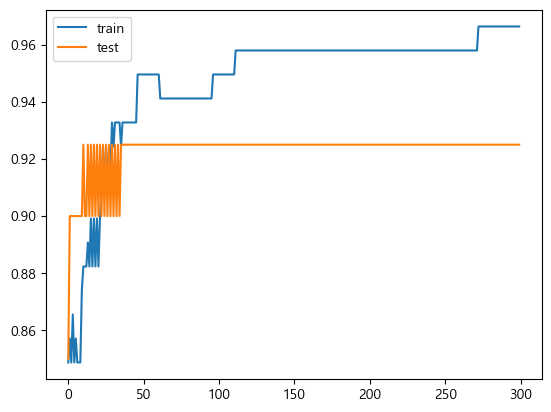

In [156]:
plt.plot(train_score, label = 'train')
plt.plot(test_score, label = 'test')
plt.legend(loc=0)

# 두 plot이 가장 많이 벌어져있는 구역(x값 약 110~): 과대적합
# x값 약 0-25 사이 :  과소적합

In [154]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42) # 반복횟수 100번에 멈춤
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

# 0.957983193277311
# 0.925

0.957983193277311
0.925
